# ML In a Nutshell
![ml](Supervised-VS-Unsupervised-Learning.png)
![mlflow2](mlflow.png)

# GOAL:
* To implement a machine learning model that classifies hand-written digits using sklearn.

## Requirements:
* Data : sklearn datasets
* classifier : decision tree classifier
* evaluation metric: accuracy through cross validation

# Scikit Learn
![meme](sklearn_meme.jpeg)
# Matplotlib
* Mastering matplotlib: https://medium.com/dataseries/mastering-matplotlib-part-1-a480109171e3
![ml_flow](imgs.png)
![matplotlib](mastering_matplotlib.jpeg)
* 
![smash](matplotlib.jpg)
## Why cross validation? Why not just test the model on test data?
![cross_val_score](cross_val_score.jpg)
* Effecient use of data since same dataset is used for training and testing. 
* More accurate estimate of out-of-sample accuracy
* See more: https://www.geeksforgeeks.org/cross-validation-machine-learning/

In [3]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import metrics

In [4]:
#loading the data
digits = load_digits()

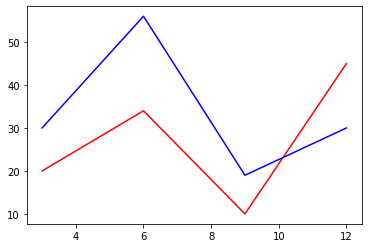

In [46]:
##matplotlib
x = [3, 6, 9, 12]
y = [20, 34, 10, 45]
y2 = [30, 56, 19, 30]
plt.plot(x, y, label='l1', color='r')
plt.plot(x, y2, label='l2', color='b')
plt.show()
#plt.legend(['l1', 'l2'])
#subplots()

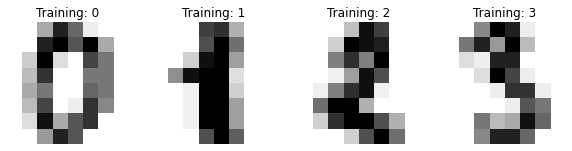

In [17]:
#Data description: 8 by 8 images of handwritten images between 0 and 9. 
#Each number is a category with a total of 10 categories i.e 0, 1, 2, 3, 4, 5, 6, 7, 8,9
#Each category has roughly 180 samples

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for axs, digit, label in zip(axes, digits.images, digits.target):
    axs.set_axis_off()
    axs.imshow(digit, cmap= plt.cm.gray_r, interpolation="nearest")
    axs.set_title("Training: %i" % label)

In [22]:
#digits
import pandas as pd

In [25]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [47]:
## DATA Wrangling
x1 = [1, 2, 3, 4, 5]
x2 = [2, 3, 4, 5, 6]
y = ['a', 'b', 'a', 'a', 'b']
df = pd.DataFrame()
df['x'] = x1
df['x2'] = x2
df['target'] = y
df

,x,x2,target
0,1,2,a
1,2,3,b
2,3,4,a
3,4,5,a
4,5,6,b


In [48]:
df.shape

(5, 3)

In [49]:
#reshaping the data to a better format. 
#result will be a df of(n_samples, n_features)
#n_samples: number of rows which = number of total handwritten images
#n_features : number of columns i.e pixels in 1, 2, 3, 4, 5, 6, 7, 8
samples = len(digits.images)
img_data = digits.images.reshape((samples, -1)) #-1 is wildcard. 


# Decision trees in life
![dtree](decisiontree.png)

In [31]:
#initiating the classifier
clf = DecisionTreeClassifier()

In [32]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [35]:
cross_validator = KFold(n_splits = 10, random_state=1, shuffle=True)
validation_results =cross_val_score(clf, img_data, digits.target,  scoring="accuracy", cv = cross_validator, n_jobs=1)
print(validation_results)

[0.91666667 0.86666667 0.85       0.83333333 0.86111111 0.84444444
 0.84444444 0.80446927 0.81564246 0.83798883]


In [36]:
validation_results.mean()

0.8474767225325885

In [37]:
X_train, X_test, y_train, y_test = train_test_split(img_data, digits.target, test_size=0.3, random_state=42)


In [38]:
df

,x,x2,target
0,1,2,a
1,2,3,b
2,3,4,a
3,4,5,a
4,5,6,b


In [50]:
#the concept of train test split
X = df[['x', 'x2']]
y = df['target']

In [51]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
x_train

,x,x2
1,2,3
2,3,4
0,1,2


In [52]:
Y_train

1    b
2    a
0    a
Name: target, dtype: object

In [53]:
x_test

,x,x2
4,5,6
3,4,5


In [54]:
Y_test

4    b
3    a
Name: target, dtype: object

In [55]:
#MAGIC!!
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
model_accuracy = metrics.accuracy_score(predictions, y_test)
model_accuracy

0.85